<a href="https://colab.research.google.com/github/NchangFor/dataanalytics-prework/blob/main/Carine_EDA_%26_Plotting_Project_CHECKARS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - EDA on Berlin Rentals

## Let's remember cars dataset:
The dataset contains the information of 10.000 cars. There are 9 different columns:
- Make (Car brand, example: Ford)
- Model (The Model of the Car, example: Focus)
- Year (The Year in which the car was build, example: 2012)
- Variant (The car model version showing the PS, example: 1.6 Trendline)
- Kms (The kilometers the cars has been driven, example: 90000)
- Price (The offered price for the car, example: 10000)
- Doors (How many doors the car has, example: 4)
- Kind (Type of car, example: Pick-Up)
- Location (Where the car is located, example: Buenos Aires)

--- 
## The Task:

You want to find why some cars are more expensive than others. For this we will explore the different variables. 
1. Have a look at the variables and formulate for every variable a hypothesis, how the variable affects the price of the flat.
2. Create an analysis for every hypothesis. Show your conclusion with a plot. 
3. Write a short conclusion to every hypothesis test.

Some hints:
- Look at correlation plots and try to find patterns that explain the price of a car
- Try to use the hue variable to compare different categorical variables (e.g. condition)
- BONUS Try to create your own variables to extract one effect and seek to explain it

In [ ]:
# Imports
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import statsmodels.api as sm

#reading data
cars = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cars.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba


#1 If the years increases the price, then a car bought in 2022 should be more expensive than a car bought in 2012
#2 If the Kms covered decreases the price, then a car which covered 10000 miles should be less expensive than a car which covered 50000 miles
#3 If the price of a car increases with an increase in door number, then a 4 door car to be more expensive than a 2 door car.

In [ ]:
sns.set(style="darkgrid")

In [ ]:
A = cars["Year"]

In [ ]:
B = cars["Kms"]

In [ ]:
C = cars["Price"]

In [ ]:
D = cars["Doors"]

#Testing Correlation


In [ ]:
cars.corr()

,Year,Kms,Price,Doors
Year,1.000000,-0.681050,0.447238,-0.029587
Kms,-0.681050,1.000000,-0.159018,-0.070608
Price,0.447238,-0.159018,1.000000,-0.111588
Doors,-0.029587,-0.070608,-0.111588,1.000000


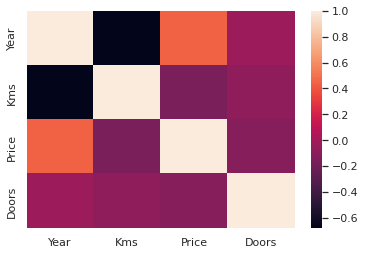

In [ ]:
sns.heatmap(cars.corr())

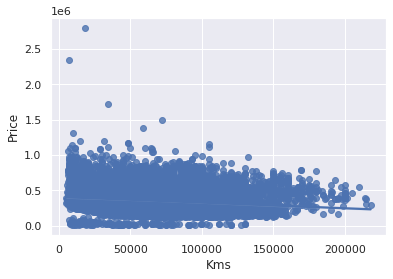

In [ ]:
sns.regplot(x = cars["Kms"], y = cars["Price"])

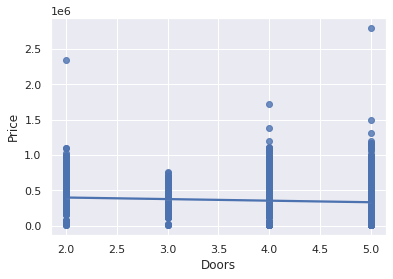

In [ ]:
sns.regplot(x = cars["Doors"], y = cars["Price"])

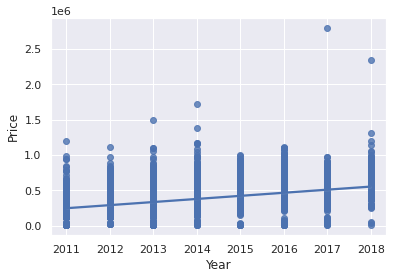

In [ ]:
sns.regplot(x = cars["Year"], y = cars["Price"])

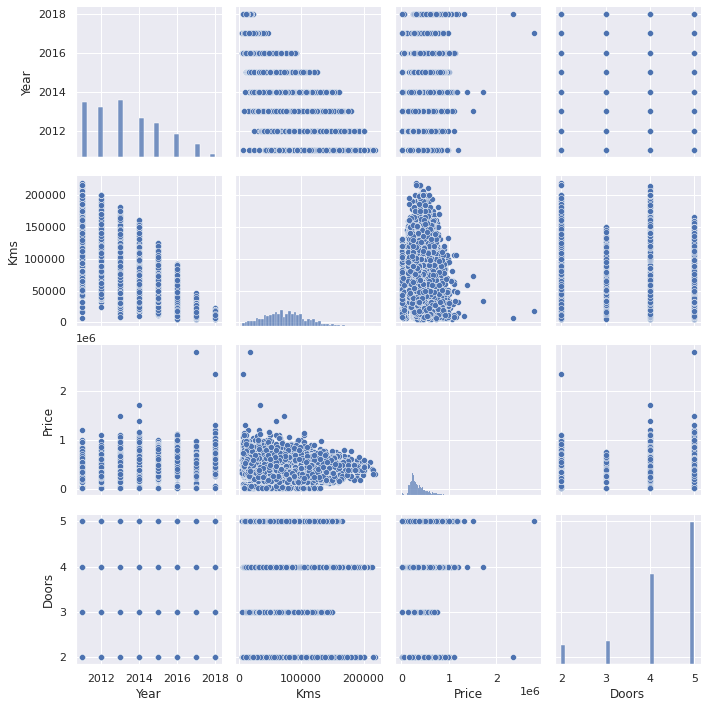

In [ ]:
sns.pairplot(cars)

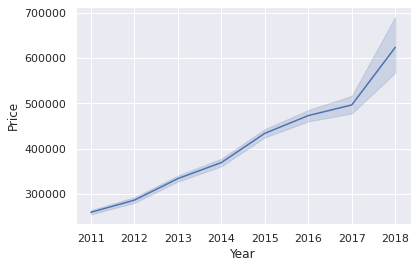

In [ ]:
sns.lineplot(x = "Year", y = "Price", data = cars)

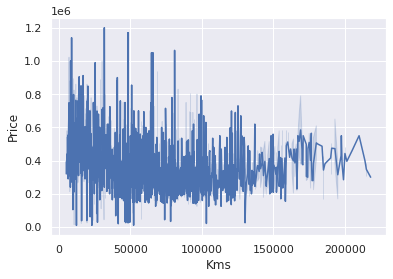

In [ ]:
sns.lineplot(x = "Kms", y = "Price", data = cars)

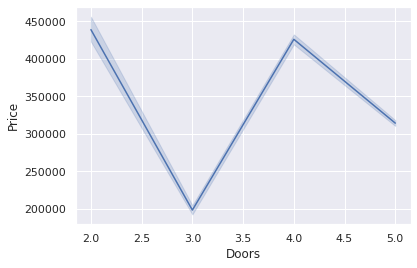

In [ ]:
sns.lineplot(x = "Doors", y = "Price", data = cars)

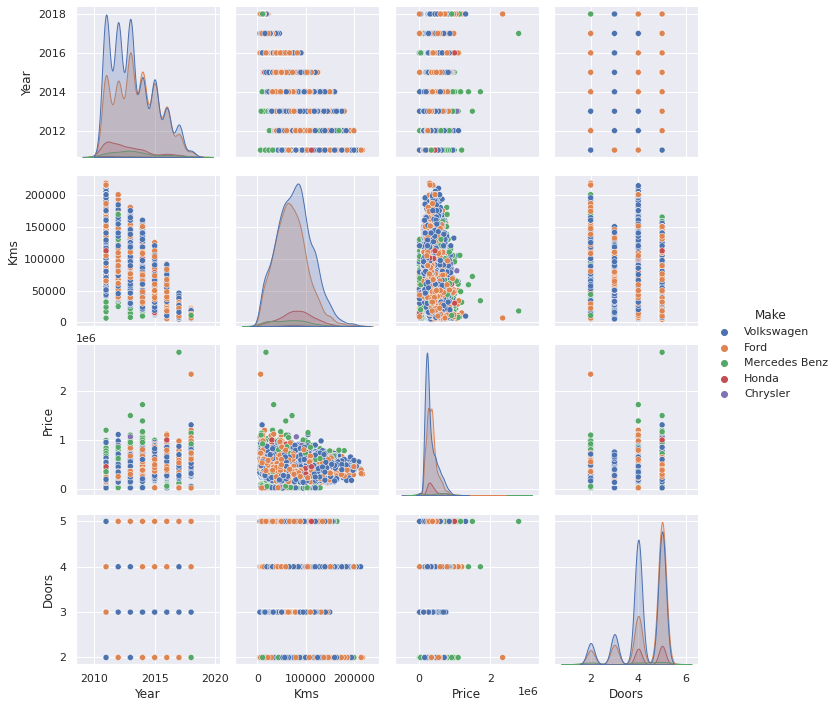

In [ ]:
sns.pairplot(cars, hue = "Make")

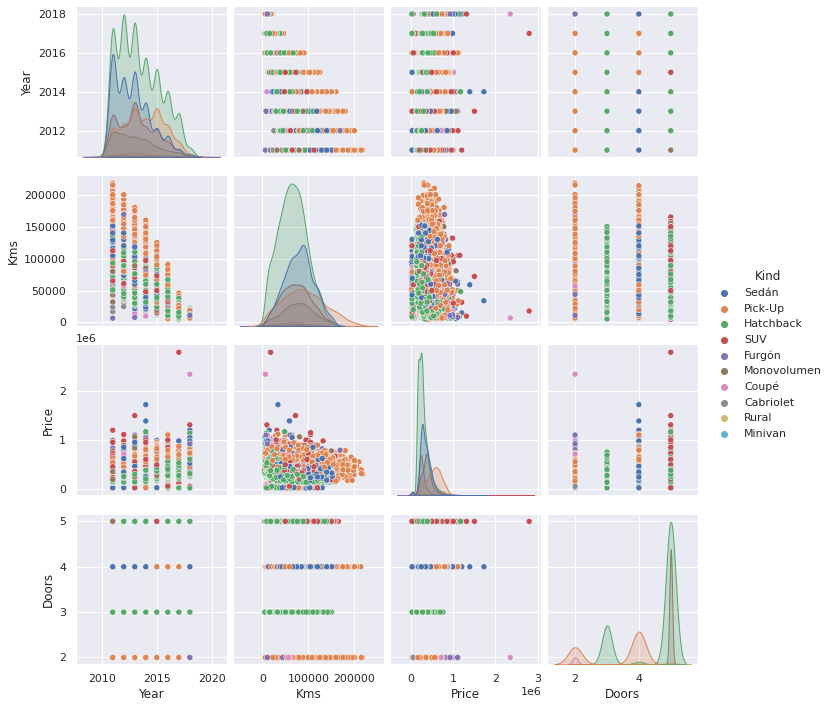

In [ ]:
sns.pairplot(cars, hue = "Kind")

# A = Year, B = Kms, C = Price, D = Doors


In [ ]:
model = sm.OLS(C, A).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                          3.893e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        20:16:30   Log-Likelihood:                     -1.3504e+05
No. Observations:               10000   AIC:                                  2.701e+05
Df Residuals:                    9999   BIC:                                  2.701e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year         173.6541      0.880    197.302      0.000     171.929     175.379
==============================================================================
Omnibus:                     3607.213   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24297.300
Skew:                           1.570   Prob(JB):                         0.00
Kurtosis:                       9.961   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model1 = sm.OLS(C, B).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                          1.512e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        20:11:07   Log-Likelihood:                     -1.3837e+05
No. Observations:               10000   AIC:                                  2.767e+05
Df Residuals:                    9999   BIC:                                  2.768e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Kms            3.6921      0.030    122.949      0.000       3.633       3.751
==============================================================================
Omnibus:                     1905.280   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5896.312
Skew:                           0.980   Prob(JB):                         0.00
Kurtosis:                       6.211   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2 = sm.OLS(C, D).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                          2.918e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        20:11:15   Log-Likelihood:                     -1.3615e+05
No. Observations:               10000   AIC:                                  2.723e+05
Df Residuals:                    9999   BIC:                                  2.723e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Doors       7.711e+04    451.356    170.834      0.000    7.62e+04     7.8e+04
==============================================================================
Omnibus:                     3032.707   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13324.192
Skew:                           1.425   Prob(JB):                         0.00
Kurtosis:                       7.885   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#All our above stated alternative hypothesis will infact affect our above stated alternative hypothesis.

In [ ]:
#@title Review Criteria:
%%html
<h3><input type="checkbox"> 1. Are all questions answered? <br></h3> 
<h3><input type="checkbox"> 2. Does all code run through? <br></h3> 
<h3><input type="checkbox"> 3. Are the conclusions understandable?  <br></h3> 
<h3><input type="checkbox"> 4. Are the bonus question answered?  <br></h3> 

In [ ]:
input("Do you have any feedback?")